- unknown: 5
- 부채_대비_소득_비율 : 표준편차 사용해서 이상치 제거
- 연간소득 : 표준편차  사용해서 이상치 제거
- 총상환원금 : 표준편차 사용해서 이상치 제거
- 총상환이자 : 표준편차 사용해서 이상치 제거
- 총계좌수 : 표준편차  사용해서 이상치 제거

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import warnings
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
warnings.filterwarnings(action='ignore')

In [2]:
train_df = pd.read_csv('C:/Users/wpfke/OneDrive/문서/ML/open/train.csv')
test_df = pd.read_csv('C:/Users/wpfke/OneDrive/문서/ML/open/test.csv')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


In [4]:
def work_year_check(s):
    if s in ['< 1 year', '<1 year']:
        return 0
    elif s in ['1 year','1 years']:
        return 1
    elif s == '2 years':
        return 2
    elif s == '3 years':
        return 3
    elif s == '4 years':
        return 4
    elif s=='5 years':
        return 5
    elif s=='6 years':
        return 6
    elif s=='7 years':
        return 7
    elif s=='8 years':
        return 8
    elif s=='9 years':
        return 9
    elif s in ['10+ years', '10+years']:
        return 10
    else:
        return 5

In [5]:
train_df['근로기간'] = train_df['근로기간'].apply(lambda x : int(work_year_check(x)))
test_df['근로기간'] = test_df['근로기간'].apply(lambda x : int(work_year_check(x)))

In [6]:
train_df['근로기간'].value_counts()

근로기간
10    32481
5     11425
2      8450
0      8144
3      7581
1      6305
4      5588
8      4888
6      3874
7      3814
9      3744
Name: count, dtype: int64

In [7]:
train_df['주택소유상태'].value_counts()

주택소유상태
MORTGAGE    47934
RENT        37705
OWN         10654
ANY             1
Name: count, dtype: int64

In [8]:
train_df.loc[train_df['주택소유상태'] == 'ANY']

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
28730,TRAIN_28730,41160000,36 months,10,ANY,93600000,17.71,20,기타,0,0,0.0,0.0,0.0,C


In [9]:
# 'ANY'인 행을 전부 삭제
# axis = 0: 행 삭제, axis = 1: 열 삭제
train_df = train_df.drop(labels=28730, axis=0)
train_df = train_df.reset_index(drop=True)

In [10]:
std_columns = ['부채_대비_소득_비율', '연간소득', '총상환원금', '총상환이자', '총계좌수']

for col in std_columns:
    # 각 컬럼에 대한 평균과 표준 편차 계산
    mean = train_df[col].mean()
    std_dev = train_df[col].std()
    
    # 이상치 제거할 기준 설정 (평균에서 3개의 표준 편차 범위 이상 떨어진 값을 이상치로 간주)
    lower_bound = mean - 3 * std_dev
    upper_bound = mean + 3 * std_dev
    
    # 이상치 제거
    train_df = train_df[(train_df[col] >= lower_bound) & (train_df[col] <= upper_bound)]


In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92223 entries, 0 to 96292
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   대출금액          92223 non-null  int64  
 1   대출기간          92223 non-null  float64
 2   근로기간          92223 non-null  int64  
 3   연간소득          92223 non-null  int64  
 4   부채_대비_소득_비율   92223 non-null  float64
 5   총계좌수          92223 non-null  int64  
 6   최근_2년간_연체_횟수  92223 non-null  int64  
 7   총상환원금         92223 non-null  int64  
 8   총상환이자         92223 non-null  float64
 9   총연체금액         92223 non-null  float64
 10  연체계좌수         92223 non-null  float64
 11  대출등급          92223 non-null  object 
 12  is_rent       92223 non-null  int64  
 13  is_mort       92223 non-null  int64  
 14  is_own        92223 non-null  int64  
 15  is_부채통합       92223 non-null  int64  
 16  is_주택개선       92223 non-null  int64  
 17  is_신용카드       92223 non-null  int64  
 18  is_그외목적       92223 non-null  i

In [11]:
# assist
train_df['대출기간'] = train_df['대출기간'].apply(lambda x: int(list(x.split(" "))[1])/12)
train_df['is_rent'] = train_df['주택소유상태'].apply(lambda x: 1 if x == 'RENT' else 0)
train_df['is_mort'] = train_df['주택소유상태'].apply(lambda x: 1 if x == 'MORTGAGE' else 0)
train_df['is_own'] = train_df['주택소유상태'].apply(lambda x: 1 if x == 'OWN' else 0)
train_df['is_부채통합'] = train_df['대출목적'].apply(lambda x: 1 if x == '부채 통합' else 0)
train_df['is_주택개선'] = train_df['대출목적'].apply(lambda x: 1 if x in ['주택 개선', '주택'] else 0)
train_df['is_신용카드'] = train_df['대출목적'].apply(lambda x: 1 if x == '신용 카드' else 0)
train_df['is_그외목적'] = train_df['대출목적'].apply(lambda x: 1 if x not in ['부채 통합', '주택 개선', '신용 카드'] else 0)

# 0-1으로 수동으로 변환시킨 변수들도 우선 제거
train_df = train_df.drop(['ID', '주택소유상태', '대출목적'], axis = 1)

In [12]:
train_df.head(5)

,대출금액,대출기간,근로기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,is_rent,is_mort,is_own,is_부채통합,is_주택개선,is_신용카드,is_그외목적
0,12480000,3.0,6,72000000,18.90,15,0,0,0.0,0.0,0.0,C,1,0,0,1,0,0,0
1,14400000,5.0,10,130800000,22.33,21,0,373572,234060.0,0.0,0.0,B,0,1,0,0,1,0,0
2,12000000,3.0,5,96000000,8.60,14,0,928644,151944.0,0.0,0.0,A,0,1,0,1,0,0,0
3,14400000,3.0,8,132000000,15.09,15,0,325824,153108.0,0.0,0.0,C,0,1,0,1,0,0,0
4,18000000,5.0,5,71736000,25.39,19,0,228540,148956.0,0.0,0.0,B,1,0,0,0,0,0,1


In [13]:
test_df['대출기간'] = test_df['대출기간'].apply(lambda x: int(list(x.split(" "))[1])/12)
test_df['is_rent'] = test_df['주택소유상태'].apply(lambda x: 1 if x == 'RENT' else 0)
test_df['is_mort'] = test_df['주택소유상태'].apply(lambda x: 1 if x == 'MORTGAGE' else 0)
test_df['is_own'] = test_df['주택소유상태'].apply(lambda x: 1 if x == 'OWN' else 0)
test_df['is_부채통합'] = test_df['대출목적'].apply(lambda x: 1 if x == '부채 통합' else 0)
test_df['is_주택개선'] = test_df['대출목적'].apply(lambda x: 1 if x in ['주택 개선', '주택'] else 0)
test_df['is_신용카드'] = test_df['대출목적'].apply(lambda x: 1 if x == '신용 카드' else 0)
test_df['is_그외목적'] = test_df['대출목적'].apply(lambda x: 1 if x not in ['부채 통합', '주택 개선', '신용 카드', '주택'] else 0)

test_df = test_df.drop(['ID', '주택소유상태', '대출목적'], axis = 1)

In [14]:
train_df_corr = train_df.copy()

In [15]:
def get_grade_to_num(x):
    if x == 'A': return 6
    if x == 'B': return 5
    if x == 'C': return 4
    if x == 'D': return 3
    if x == 'E': return 2
    if x == 'F': return 1
    if x == 'G': return 0

train_df_corr['grade'] = train_df_corr['대출등급'].apply(lambda x : get_grade_to_num(x))
train_df_corr = train_df_corr.drop(['대출등급'], axis = 1)

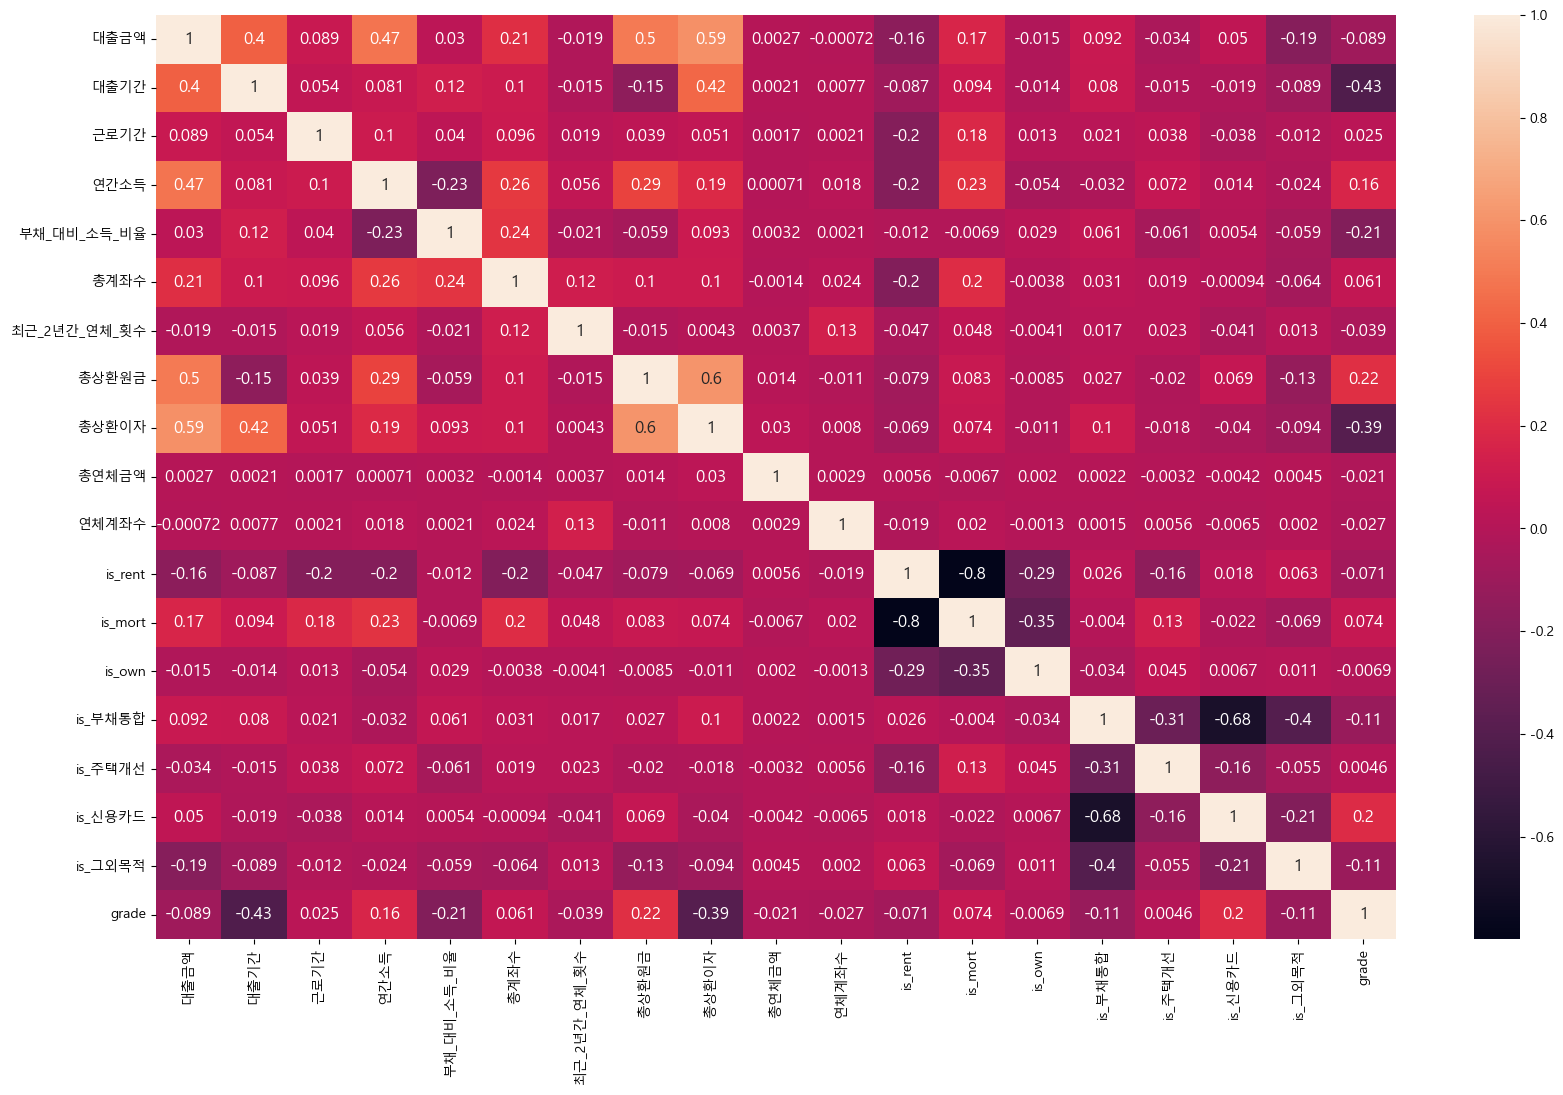

In [16]:
plt.rcParams["figure.figsize"] = (20,12)
sns.heatmap(train_df_corr.corr(), annot = True, annot_kws={"size": 12})
plt.rc('axes', labelsize=36) 
plt.show()

In [17]:
X = train_df.drop(['대출등급'], axis = 1)
y = train_df['대출등급']

from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 42)

In [18]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(max_depth = 7, random_state = 42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(f1_score(pred, y_test, average = 'macro'))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002844 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1402
[LightGBM] [Info] Number of data points in the train set: 69167, number of used features: 18
[LightGBM] [Info] Start training from score -1.734760
[LightGBM] [Info] Start training from score -1.184742
[LightGBM] [Info] Start training from score -1.233617
[LightGBM] [Info] Start training from score -1.992416
[LightGBM] [Info] Start training from score -2.652199
[LightGBM] [Info] Start training from score -4.107252
[LightGBM] [Info] Start training from score -5.750652
[LightGBM